## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 1
bias = 0.1


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0  13.924811  1574.169836  0.417547  2.757088  1.415915
1  61.444317   457.732212  0.035279  8.894243  0.352230
2  96.899294  1627.286138  0.054746  5.512850  0.671999
3  10.901380  1624.818411  0.075413  8.032940  1.439659
4   3.432003   604.195195  0.133203  4.971767  1.541005


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 1.23464 | train_mse: 2.3895  | train_mae: 1.19611 |  0:00:00s
epoch 1  | loss: 0.66822 | train_mse: 5.0066  | train_mae: 1.70815 |  0:00:00s
epoch 2  | loss: 0.70774 | train_mse: 5.18414 | train_mae: 1.61991 |  0:00:00s


epoch 3  | loss: 0.54994 | train_mse: 2.56884 | train_mae: 1.26434 |  0:00:00s
epoch 4  | loss: 0.57891 | train_mse: 2.18055 | train_mae: 1.09822 |  0:00:00s
epoch 5  | loss: 0.54777 | train_mse: 2.32207 | train_mae: 1.06296 |  0:00:00s


epoch 6  | loss: 0.47981 | train_mse: 1.48212 | train_mae: 0.84263 |  0:00:00s
epoch 7  | loss: 0.50607 | train_mse: 0.96456 | train_mae: 0.7096  |  0:00:00s


epoch 8  | loss: 0.38522 | train_mse: 0.81172 | train_mae: 0.66685 |  0:00:00s
epoch 9  | loss: 0.27722 | train_mse: 1.00454 | train_mae: 0.74295 |  0:00:00s
epoch 10 | loss: 0.24478 | train_mse: 1.35682 | train_mae: 0.86764 |  0:00:01s


epoch 11 | loss: 0.2978  | train_mse: 1.45956 | train_mae: 0.89382 |  0:00:01s
epoch 12 | loss: 0.17707 | train_mse: 1.18078 | train_mae: 0.78112 |  0:00:01s
epoch 13 | loss: 0.27083 | train_mse: 0.88837 | train_mae: 0.67477 |  0:00:01s
epoch 14 | loss: 0.26406 | train_mse: 0.62126 | train_mae: 0.58872 |  0:00:01s


epoch 15 | loss: 0.23799 | train_mse: 0.59666 | train_mae: 0.56456 |  0:00:01s
epoch 16 | loss: 0.23477 | train_mse: 0.94469 | train_mae: 0.64771 |  0:00:01s
epoch 17 | loss: 0.13212 | train_mse: 0.95298 | train_mae: 0.67224 |  0:00:01s
epoch 18 | loss: 0.26526 | train_mse: 0.81864 | train_mae: 0.61146 |  0:00:01s


epoch 19 | loss: 0.26292 | train_mse: 0.44005 | train_mae: 0.47741 |  0:00:01s
epoch 20 | loss: 0.17181 | train_mse: 0.26393 | train_mae: 0.39432 |  0:00:01s
epoch 21 | loss: 0.2014  | train_mse: 0.21465 | train_mae: 0.35476 |  0:00:01s


epoch 22 | loss: 0.13325 | train_mse: 0.17556 | train_mae: 0.31851 |  0:00:01s
epoch 23 | loss: 0.12136 | train_mse: 0.24419 | train_mae: 0.36919 |  0:00:01s
epoch 24 | loss: 0.16958 | train_mse: 0.24158 | train_mae: 0.37381 |  0:00:01s
epoch 25 | loss: 0.09021 | train_mse: 0.28411 | train_mae: 0.404   |  0:00:02s


epoch 26 | loss: 0.20284 | train_mse: 0.28283 | train_mae: 0.39678 |  0:00:02s
epoch 27 | loss: 0.11657 | train_mse: 0.37888 | train_mae: 0.43962 |  0:00:02s
epoch 28 | loss: 0.32109 | train_mse: 0.37267 | train_mae: 0.42693 |  0:00:02s
epoch 29 | loss: 0.15232 | train_mse: 0.32901 | train_mae: 0.39775 |  0:00:02s


epoch 30 | loss: 0.10879 | train_mse: 0.28291 | train_mae: 0.37898 |  0:00:02s
epoch 31 | loss: 0.11589 | train_mse: 0.28892 | train_mae: 0.39087 |  0:00:02s
epoch 32 | loss: 0.15093 | train_mse: 0.251   | train_mae: 0.35741 |  0:00:02s
epoch 33 | loss: 0.14806 | train_mse: 0.2368  | train_mae: 0.33947 |  0:00:02s


epoch 34 | loss: 0.08035 | train_mse: 0.18191 | train_mae: 0.29693 |  0:00:02s
epoch 35 | loss: 0.19198 | train_mse: 0.1501  | train_mae: 0.27235 |  0:00:02s
epoch 36 | loss: 0.2069  | train_mse: 0.16025 | train_mae: 0.28175 |  0:00:02s


epoch 37 | loss: 0.20716 | train_mse: 0.13171 | train_mae: 0.26038 |  0:00:02s
epoch 38 | loss: 0.18081 | train_mse: 0.11961 | train_mae: 0.25219 |  0:00:02s
epoch 39 | loss: 0.09007 | train_mse: 0.11333 | train_mae: 0.24633 |  0:00:02s


epoch 40 | loss: 0.12904 | train_mse: 0.10453 | train_mae: 0.24251 |  0:00:03s
epoch 41 | loss: 0.11133 | train_mse: 0.1042  | train_mae: 0.26117 |  0:00:03s
epoch 42 | loss: 0.17709 | train_mse: 0.14087 | train_mae: 0.29981 |  0:00:03s
epoch 43 | loss: 0.10379 | train_mse: 0.13201 | train_mae: 0.27429 |  0:00:03s


epoch 44 | loss: 0.12173 | train_mse: 0.18145 | train_mae: 0.31518 |  0:00:03s
epoch 45 | loss: 0.09131 | train_mse: 0.168   | train_mae: 0.31205 |  0:00:03s
epoch 46 | loss: 0.10302 | train_mse: 0.12741 | train_mae: 0.27554 |  0:00:03s
epoch 47 | loss: 0.15966 | train_mse: 0.10345 | train_mae: 0.24718 |  0:00:03s


epoch 48 | loss: 0.15783 | train_mse: 0.11478 | train_mae: 0.25032 |  0:00:03s
epoch 49 | loss: 0.11736 | train_mse: 0.13377 | train_mae: 0.26561 |  0:00:03s
epoch 50 | loss: 0.11891 | train_mse: 0.15289 | train_mae: 0.28612 |  0:00:03s
epoch 51 | loss: 0.1754  | train_mse: 0.11333 | train_mae: 0.24741 |  0:00:03s


epoch 52 | loss: 0.15906 | train_mse: 0.09255 | train_mae: 0.23139 |  0:00:03s
epoch 53 | loss: 0.24249 | train_mse: 0.10354 | train_mae: 0.24922 |  0:00:03s
epoch 54 | loss: 0.08649 | train_mse: 0.08279 | train_mae: 0.21926 |  0:00:03s


epoch 55 | loss: 0.10635 | train_mse: 0.07603 | train_mae: 0.21451 |  0:00:04s
epoch 56 | loss: 0.25874 | train_mse: 0.08468 | train_mae: 0.22657 |  0:00:04s
epoch 57 | loss: 0.11394 | train_mse: 0.07847 | train_mae: 0.2175  |  0:00:04s
epoch 58 | loss: 0.11468 | train_mse: 0.09002 | train_mae: 0.23676 |  0:00:04s


epoch 59 | loss: 0.08314 | train_mse: 0.07583 | train_mae: 0.2132  |  0:00:04s
epoch 60 | loss: 0.06549 | train_mse: 0.0707  | train_mae: 0.20302 |  0:00:04s
epoch 61 | loss: 0.11195 | train_mse: 0.07354 | train_mae: 0.20985 |  0:00:04s


epoch 62 | loss: 0.2037  | train_mse: 0.074   | train_mae: 0.21209 |  0:00:04s
epoch 63 | loss: 0.09754 | train_mse: 0.07149 | train_mae: 0.20821 |  0:00:04s


epoch 64 | loss: 0.10724 | train_mse: 0.06841 | train_mae: 0.20293 |  0:00:04s
epoch 65 | loss: 0.1468  | train_mse: 0.07247 | train_mae: 0.20738 |  0:00:05s


epoch 66 | loss: 0.25486 | train_mse: 0.08551 | train_mae: 0.23207 |  0:00:05s


epoch 67 | loss: 0.0789  | train_mse: 0.07704 | train_mae: 0.22062 |  0:00:05s
epoch 68 | loss: 0.121   | train_mse: 0.07277 | train_mae: 0.21049 |  0:00:05s


epoch 69 | loss: 0.13911 | train_mse: 0.06602 | train_mae: 0.2026  |  0:00:05s
epoch 70 | loss: 0.14713 | train_mse: 0.07585 | train_mae: 0.21484 |  0:00:05s
epoch 71 | loss: 0.13166 | train_mse: 0.07328 | train_mae: 0.21119 |  0:00:05s


epoch 72 | loss: 0.08131 | train_mse: 0.07756 | train_mae: 0.22547 |  0:00:06s
epoch 73 | loss: 0.09188 | train_mse: 0.08175 | train_mae: 0.22808 |  0:00:06s
epoch 74 | loss: 0.23147 | train_mse: 0.09609 | train_mae: 0.24101 |  0:00:06s


epoch 75 | loss: 0.1057  | train_mse: 0.09112 | train_mae: 0.23977 |  0:00:06s
epoch 76 | loss: 0.15682 | train_mse: 0.07376 | train_mae: 0.207   |  0:00:06s
epoch 77 | loss: 0.15663 | train_mse: 0.06734 | train_mae: 0.20179 |  0:00:06s


epoch 78 | loss: 0.11227 | train_mse: 0.06952 | train_mae: 0.20743 |  0:00:06s
epoch 79 | loss: 0.07273 | train_mse: 0.06622 | train_mae: 0.20126 |  0:00:06s


epoch 80 | loss: 0.09098 | train_mse: 0.07039 | train_mae: 0.20077 |  0:00:07s
epoch 81 | loss: 0.13509 | train_mse: 0.07607 | train_mae: 0.21574 |  0:00:07s
epoch 82 | loss: 0.09809 | train_mse: 0.06127 | train_mae: 0.19383 |  0:00:07s


epoch 83 | loss: 0.08834 | train_mse: 0.06926 | train_mae: 0.21375 |  0:00:07s
epoch 84 | loss: 0.12438 | train_mse: 0.05314 | train_mae: 0.187   |  0:00:07s
epoch 85 | loss: 0.16835 | train_mse: 0.06993 | train_mae: 0.20949 |  0:00:07s
epoch 86 | loss: 0.07577 | train_mse: 0.06419 | train_mae: 0.20096 |  0:00:07s


epoch 87 | loss: 0.0784  | train_mse: 0.05894 | train_mae: 0.20491 |  0:00:07s
epoch 88 | loss: 0.12695 | train_mse: 0.0619  | train_mae: 0.20672 |  0:00:07s
epoch 89 | loss: 0.08999 | train_mse: 0.05868 | train_mae: 0.19488 |  0:00:07s
epoch 90 | loss: 0.1032  | train_mse: 0.06332 | train_mae: 0.20149 |  0:00:07s


epoch 91 | loss: 0.13246 | train_mse: 0.073   | train_mae: 0.21456 |  0:00:07s
epoch 92 | loss: 0.12956 | train_mse: 0.07828 | train_mae: 0.22542 |  0:00:07s
epoch 93 | loss: 0.08574 | train_mse: 0.08569 | train_mae: 0.24105 |  0:00:07s


epoch 94 | loss: 0.08201 | train_mse: 0.0753  | train_mae: 0.2248  |  0:00:08s
epoch 95 | loss: 0.12353 | train_mse: 0.05689 | train_mae: 0.19018 |  0:00:08s
epoch 96 | loss: 0.15131 | train_mse: 0.05085 | train_mae: 0.17577 |  0:00:08s
epoch 97 | loss: 0.12707 | train_mse: 0.04751 | train_mae: 0.17406 |  0:00:08s


epoch 98 | loss: 0.10137 | train_mse: 0.10607 | train_mae: 0.24045 |  0:00:08s
epoch 99 | loss: 0.13295 | train_mse: 0.19255 | train_mae: 0.30647 |  0:00:08s
epoch 100| loss: 0.11661 | train_mse: 0.15528 | train_mae: 0.2715  |  0:00:08s


epoch 101| loss: 0.09421 | train_mse: 0.10996 | train_mae: 0.22624 |  0:00:08s
epoch 102| loss: 0.09826 | train_mse: 0.0917  | train_mae: 0.21343 |  0:00:08s
epoch 103| loss: 0.14513 | train_mse: 0.06465 | train_mae: 0.20233 |  0:00:08s
epoch 104| loss: 0.12637 | train_mse: 0.06616 | train_mae: 0.20707 |  0:00:08s


epoch 105| loss: 0.13031 | train_mse: 0.05105 | train_mae: 0.18453 |  0:00:08s
epoch 106| loss: 0.09361 | train_mse: 0.04777 | train_mae: 0.18228 |  0:00:08s
epoch 107| loss: 0.11414 | train_mse: 0.04898 | train_mae: 0.18549 |  0:00:08s


epoch 108| loss: 0.23096 | train_mse: 0.04976 | train_mae: 0.18453 |  0:00:08s
epoch 109| loss: 0.07957 | train_mse: 0.04899 | train_mae: 0.18202 |  0:00:09s
epoch 110| loss: 0.13429 | train_mse: 0.04744 | train_mae: 0.17521 |  0:00:09s
epoch 111| loss: 0.09518 | train_mse: 0.04856 | train_mae: 0.17993 |  0:00:09s


epoch 112| loss: 0.1216  | train_mse: 0.05172 | train_mae: 0.18248 |  0:00:09s
epoch 113| loss: 0.16036 | train_mse: 0.05523 | train_mae: 0.18141 |  0:00:09s
epoch 114| loss: 0.13551 | train_mse: 0.05122 | train_mae: 0.17979 |  0:00:09s
epoch 115| loss: 0.06247 | train_mse: 0.0639  | train_mae: 0.20201 |  0:00:09s


epoch 116| loss: 0.08832 | train_mse: 0.08046 | train_mae: 0.21913 |  0:00:09s
epoch 117| loss: 0.06782 | train_mse: 0.07195 | train_mae: 0.20861 |  0:00:09s
epoch 118| loss: 0.08405 | train_mse: 0.07217 | train_mae: 0.20984 |  0:00:09s
epoch 119| loss: 0.07174 | train_mse: 0.06718 | train_mae: 0.21012 |  0:00:09s


epoch 120| loss: 0.08317 | train_mse: 0.06081 | train_mae: 0.19916 |  0:00:09s
epoch 121| loss: 0.08589 | train_mse: 0.05817 | train_mae: 0.19341 |  0:00:09s
epoch 122| loss: 0.08747 | train_mse: 0.06505 | train_mae: 0.20382 |  0:00:09s


epoch 123| loss: 0.06616 | train_mse: 0.0721  | train_mae: 0.21336 |  0:00:09s
epoch 124| loss: 0.05897 | train_mse: 0.06433 | train_mae: 0.19908 |  0:00:10s
epoch 125| loss: 0.13493 | train_mse: 0.05567 | train_mae: 0.18786 |  0:00:10s
epoch 126| loss: 0.10029 | train_mse: 0.0612  | train_mae: 0.19303 |  0:00:10s


epoch 127| loss: 0.10701 | train_mse: 0.0599  | train_mae: 0.19545 |  0:00:10s
epoch 128| loss: 0.08395 | train_mse: 0.06551 | train_mae: 0.2044  |  0:00:10s
epoch 129| loss: 0.08755 | train_mse: 0.06769 | train_mae: 0.20456 |  0:00:10s
epoch 130| loss: 0.1366  | train_mse: 0.05276 | train_mae: 0.18795 |  0:00:10s


epoch 131| loss: 0.06301 | train_mse: 0.05553 | train_mae: 0.18961 |  0:00:10s
epoch 132| loss: 0.12045 | train_mse: 0.05716 | train_mae: 0.19372 |  0:00:10s
epoch 133| loss: 0.06482 | train_mse: 0.04019 | train_mae: 0.16619 |  0:00:10s
epoch 134| loss: 0.20239 | train_mse: 0.05652 | train_mae: 0.19579 |  0:00:10s


epoch 135| loss: 0.08317 | train_mse: 0.04285 | train_mae: 0.17228 |  0:00:10s
epoch 136| loss: 0.0938  | train_mse: 0.05285 | train_mae: 0.19291 |  0:00:10s
epoch 137| loss: 0.09079 | train_mse: 0.04581 | train_mae: 0.17954 |  0:00:10s


epoch 138| loss: 0.07379 | train_mse: 0.04162 | train_mae: 0.16794 |  0:00:10s
epoch 139| loss: 0.12006 | train_mse: 0.04668 | train_mae: 0.18112 |  0:00:11s
epoch 140| loss: 0.06085 | train_mse: 0.04204 | train_mae: 0.17007 |  0:00:11s
epoch 141| loss: 0.07883 | train_mse: 0.03733 | train_mae: 0.16121 |  0:00:11s


epoch 142| loss: 0.08263 | train_mse: 0.04255 | train_mae: 0.17167 |  0:00:11s
epoch 143| loss: 0.06437 | train_mse: 0.04423 | train_mae: 0.17253 |  0:00:11s
epoch 144| loss: 0.15274 | train_mse: 0.0581  | train_mae: 0.19001 |  0:00:11s
epoch 145| loss: 0.06336 | train_mse: 0.05925 | train_mae: 0.19375 |  0:00:11s


epoch 146| loss: 0.09805 | train_mse: 0.0559  | train_mae: 0.19149 |  0:00:11s
epoch 147| loss: 0.0964  | train_mse: 0.03867 | train_mae: 0.16582 |  0:00:11s
epoch 148| loss: 0.0631  | train_mse: 0.03612 | train_mae: 0.15892 |  0:00:11s
epoch 149| loss: 0.05378 | train_mse: 0.03422 | train_mae: 0.15468 |  0:00:11s


epoch 150| loss: 0.06475 | train_mse: 0.03295 | train_mae: 0.15312 |  0:00:11s
epoch 151| loss: 0.04671 | train_mse: 0.03542 | train_mae: 0.15648 |  0:00:11s
epoch 152| loss: 0.09141 | train_mse: 0.03848 | train_mae: 0.16416 |  0:00:11s


epoch 153| loss: 0.12393 | train_mse: 0.0548  | train_mae: 0.18801 |  0:00:11s
epoch 154| loss: 0.14712 | train_mse: 0.0632  | train_mae: 0.19914 |  0:00:12s
epoch 155| loss: 0.15317 | train_mse: 0.05535 | train_mae: 0.19733 |  0:00:12s
epoch 156| loss: 0.10469 | train_mse: 0.04862 | train_mae: 0.18078 |  0:00:12s


epoch 157| loss: 0.06901 | train_mse: 0.04018 | train_mae: 0.16514 |  0:00:12s
epoch 158| loss: 0.04948 | train_mse: 0.03895 | train_mae: 0.16519 |  0:00:12s
epoch 159| loss: 0.1123  | train_mse: 0.04077 | train_mae: 0.16257 |  0:00:12s
epoch 160| loss: 0.08066 | train_mse: 0.04029 | train_mae: 0.1695  |  0:00:12s


epoch 161| loss: 0.14991 | train_mse: 0.05554 | train_mae: 0.18434 |  0:00:12s
epoch 162| loss: 0.09917 | train_mse: 0.05379 | train_mae: 0.18063 |  0:00:12s
epoch 163| loss: 0.07363 | train_mse: 0.04846 | train_mae: 0.17842 |  0:00:12s
epoch 164| loss: 0.07816 | train_mse: 0.06394 | train_mae: 0.20006 |  0:00:12s


epoch 165| loss: 0.10815 | train_mse: 0.0755  | train_mae: 0.21675 |  0:00:12s
epoch 166| loss: 0.24208 | train_mse: 0.08979 | train_mae: 0.22724 |  0:00:12s
epoch 167| loss: 0.07866 | train_mse: 0.11593 | train_mae: 0.25712 |  0:00:12s


epoch 168| loss: 0.09848 | train_mse: 0.10651 | train_mae: 0.24988 |  0:00:12s
epoch 169| loss: 0.20926 | train_mse: 0.09241 | train_mae: 0.23201 |  0:00:13s
epoch 170| loss: 0.13722 | train_mse: 0.06692 | train_mae: 0.20539 |  0:00:13s
epoch 171| loss: 0.06592 | train_mse: 0.09467 | train_mae: 0.22395 |  0:00:13s


epoch 172| loss: 0.0904  | train_mse: 0.10153 | train_mae: 0.23975 |  0:00:13s
epoch 173| loss: 0.13786 | train_mse: 0.09757 | train_mae: 0.24225 |  0:00:13s
epoch 174| loss: 0.1239  | train_mse: 0.0665  | train_mae: 0.20105 |  0:00:13s
epoch 175| loss: 0.07318 | train_mse: 0.06589 | train_mae: 0.19636 |  0:00:13s


epoch 176| loss: 0.09879 | train_mse: 0.06826 | train_mae: 0.19827 |  0:00:13s
epoch 177| loss: 0.11052 | train_mse: 0.06103 | train_mae: 0.20139 |  0:00:13s
epoch 178| loss: 0.09206 | train_mse: 0.06516 | train_mae: 0.21557 |  0:00:13s
epoch 179| loss: 0.07572 | train_mse: 0.0659  | train_mae: 0.21307 |  0:00:13s


epoch 180| loss: 0.07048 | train_mse: 0.06383 | train_mae: 0.20393 |  0:00:13s
epoch 181| loss: 0.14604 | train_mse: 0.06113 | train_mae: 0.19785 |  0:00:13s
epoch 182| loss: 0.13318 | train_mse: 0.06122 | train_mae: 0.20202 |  0:00:13s


epoch 183| loss: 0.19017 | train_mse: 0.06435 | train_mae: 0.21403 |  0:00:13s
epoch 184| loss: 0.08473 | train_mse: 0.06953 | train_mae: 0.2171  |  0:00:14s
epoch 185| loss: 0.13192 | train_mse: 0.06534 | train_mae: 0.20506 |  0:00:14s
epoch 186| loss: 0.09416 | train_mse: 0.0636  | train_mae: 0.20037 |  0:00:14s


epoch 187| loss: 0.10292 | train_mse: 0.05557 | train_mae: 0.18591 |  0:00:14s
epoch 188| loss: 0.06721 | train_mse: 0.05225 | train_mae: 0.18771 |  0:00:14s
epoch 189| loss: 0.14544 | train_mse: 0.05785 | train_mae: 0.1962  |  0:00:14s
epoch 190| loss: 0.09781 | train_mse: 0.06608 | train_mae: 0.20621 |  0:00:14s


epoch 191| loss: 0.09851 | train_mse: 0.06808 | train_mae: 0.20598 |  0:00:14s
epoch 192| loss: 0.08593 | train_mse: 0.07616 | train_mae: 0.20452 |  0:00:14s
epoch 193| loss: 0.09824 | train_mse: 0.05794 | train_mae: 0.18428 |  0:00:14s
epoch 194| loss: 0.07358 | train_mse: 0.05126 | train_mae: 0.18367 |  0:00:14s


epoch 195| loss: 0.12327 | train_mse: 0.05457 | train_mae: 0.18872 |  0:00:14s
epoch 196| loss: 0.08541 | train_mse: 0.04256 | train_mae: 0.17532 |  0:00:14s
epoch 197| loss: 0.07592 | train_mse: 0.04673 | train_mae: 0.18209 |  0:00:14s


epoch 198| loss: 0.0886  | train_mse: 0.04298 | train_mae: 0.16993 |  0:00:14s
epoch 199| loss: 0.19959 | train_mse: 0.05504 | train_mae: 0.1888  |  0:00:15s
epoch 200| loss: 0.09407 | train_mse: 0.0675  | train_mae: 0.20626 |  0:00:15s

Early stopping occurred at epoch 200 with best_epoch = 150 and best_train_mae = 0.15312
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

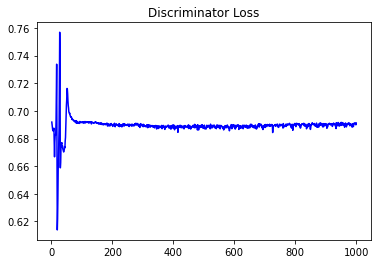

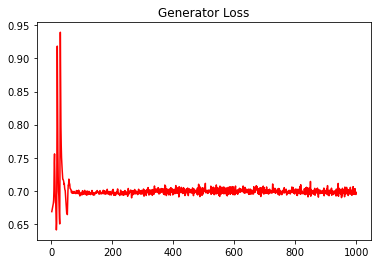

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.24510443856734188


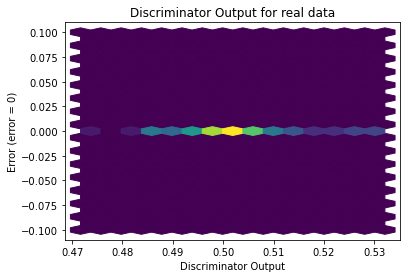

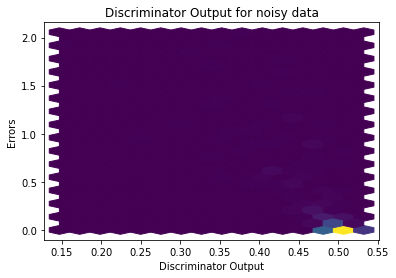

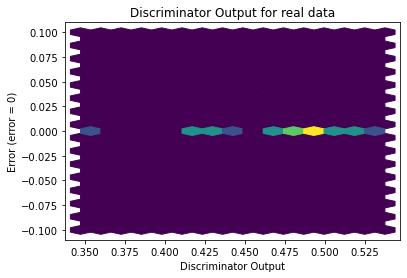

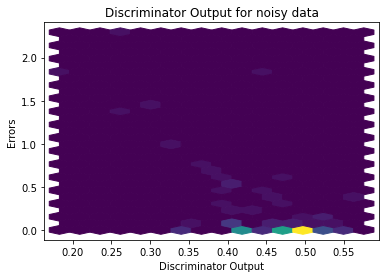

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


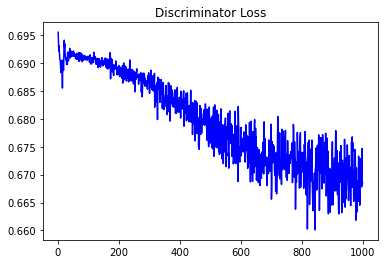

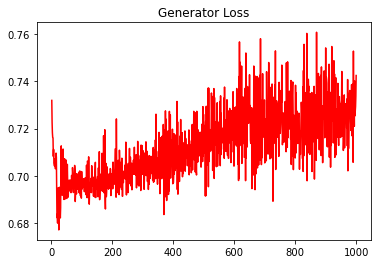

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.23014184296290705


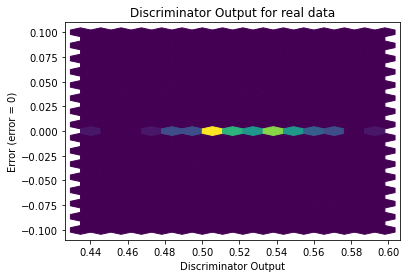

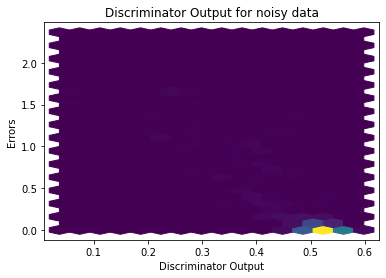

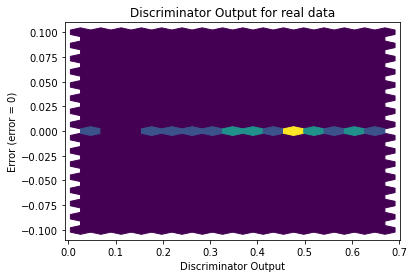

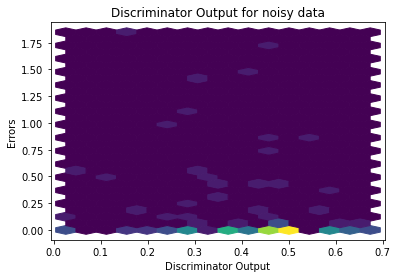

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.1514]], requires_grad=True)
